In [6]:
from google.colab import drive

# Unmount the drive first
drive.flush_and_unmount()
print('Drive unmounted')

# Remove existing files from the mountpoint if it exists
import os
if os.path.exists('/content/drive'):
  !rm -rf '/content/drive'  # Use with caution! This permanently deletes all files in the directory.
  print('Files removed from mountpoint')

# Remount the drive
drive.mount('/content/drive')
print('Drive mounted')

Drive not mounted, so nothing to flush and unmount.
Drive unmounted
Mounted at /content/drive
Drive mounted


Song Word Cloud

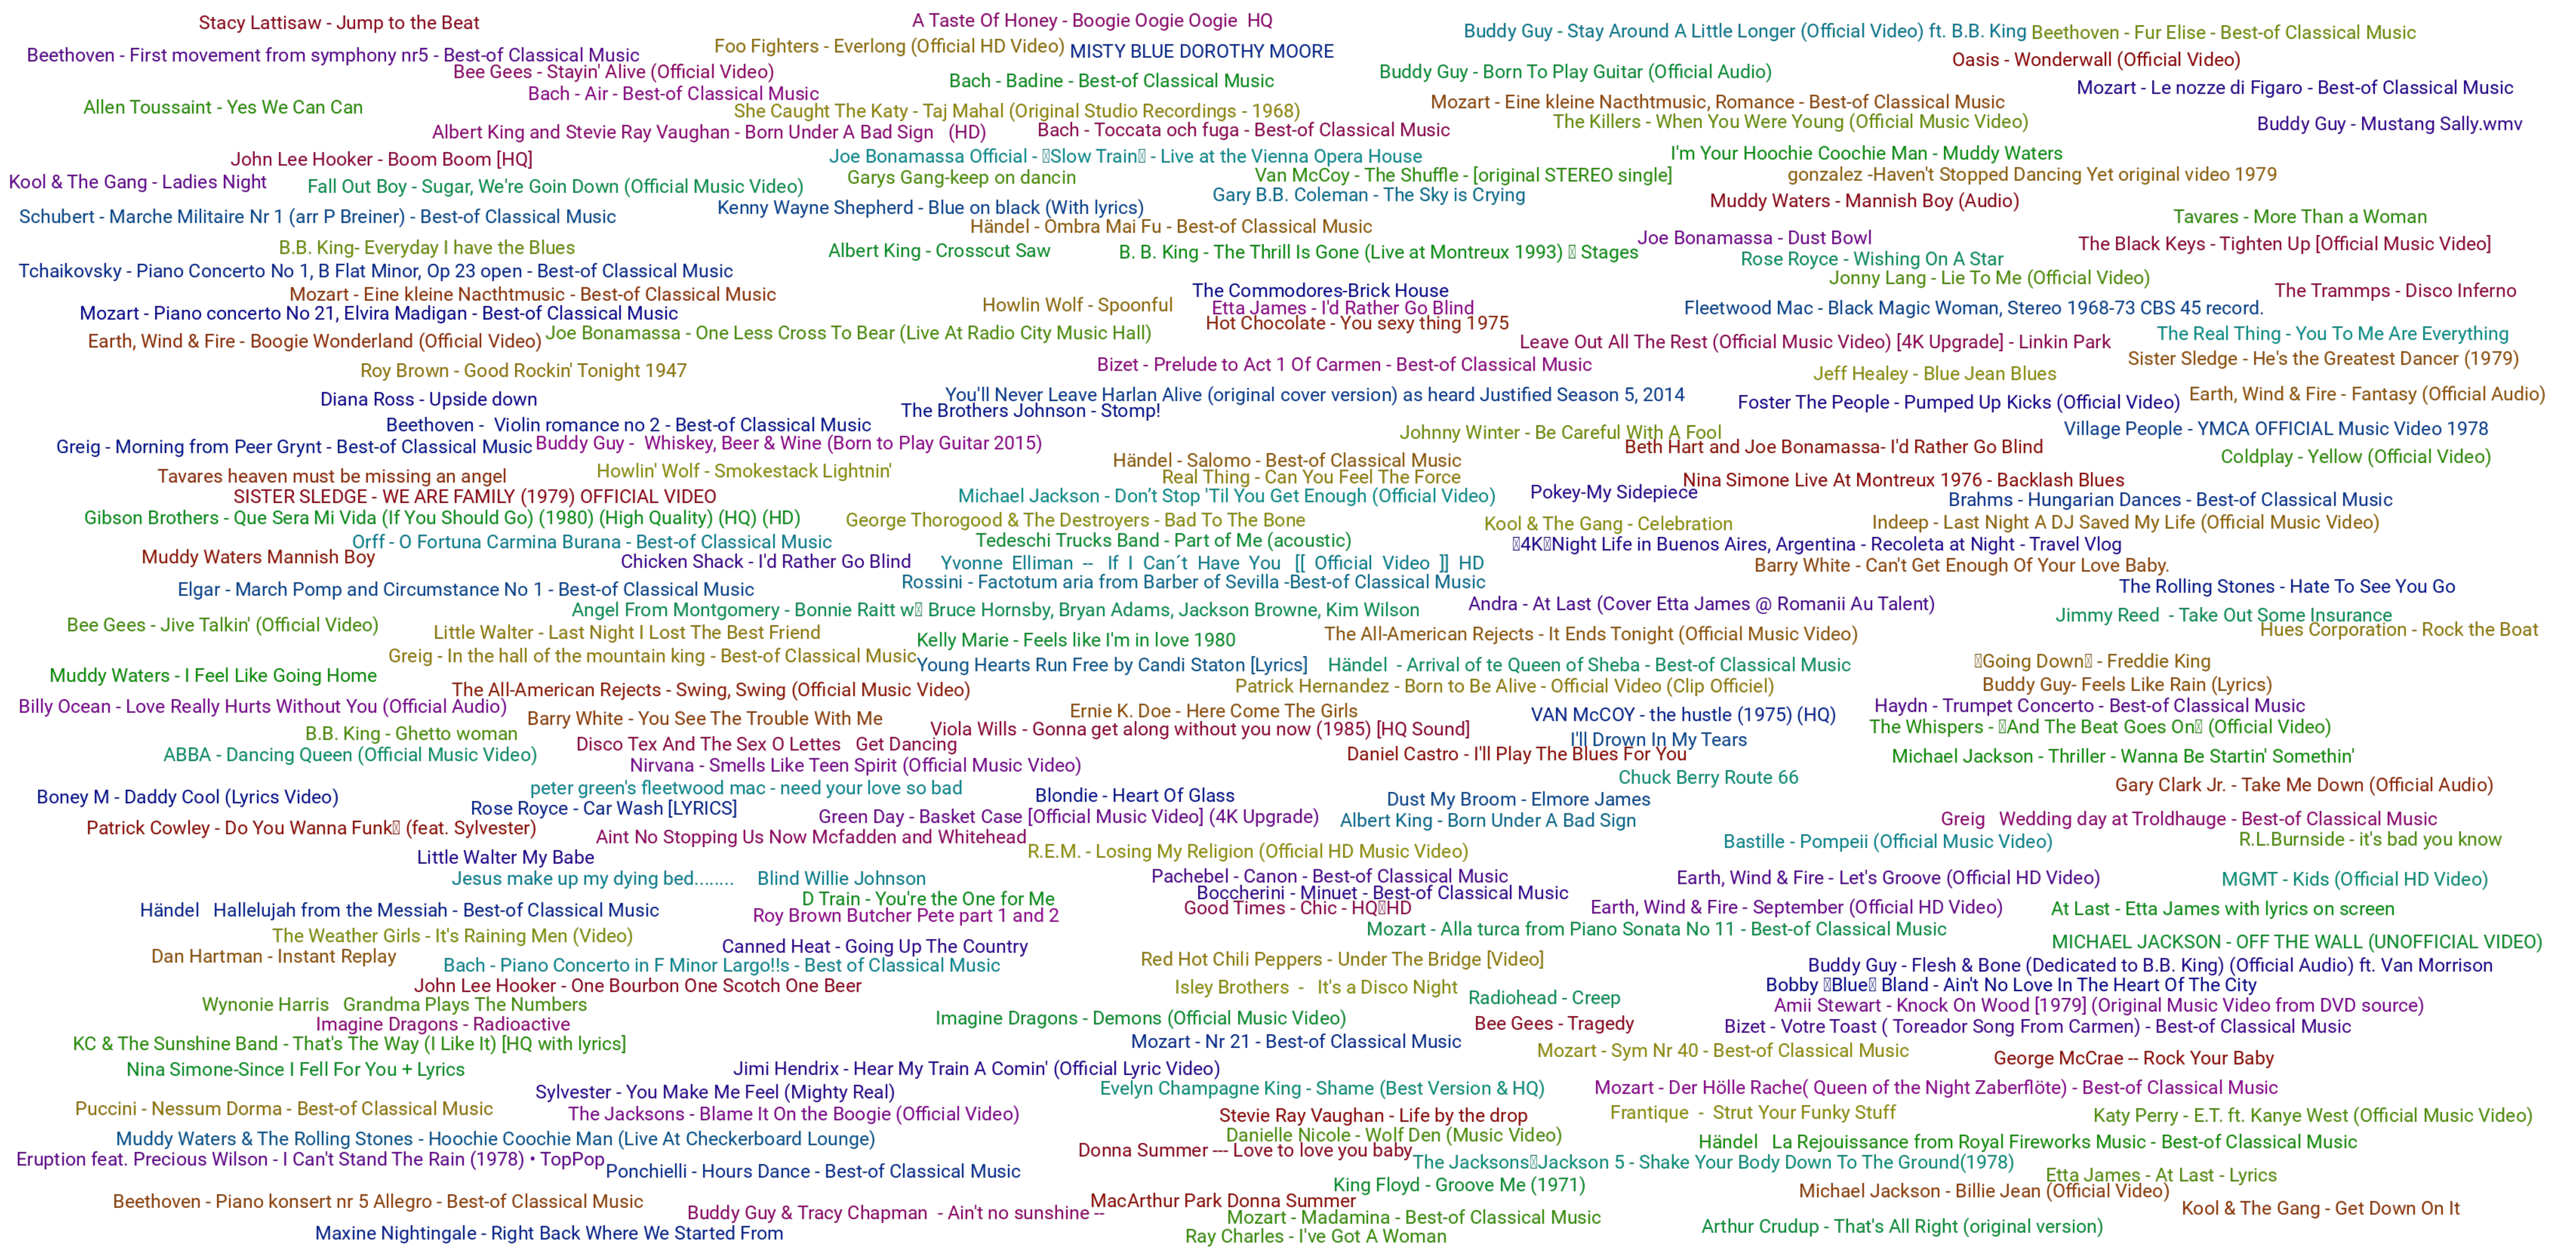

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import requests

# Function to generate random colors
def random_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, 27%)".format(random.randint(0, 360))

class CustomWordCloud(WordCloud):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _draw_word(self, **kwargs):
        # Override the orientation with a random choice
        kwargs['orientation'] = random.choice([None, 0, 1, 2, 3])
        return super()._draw_word(**kwargs)

# Input text
text = """Bastille - Pompeii (Official Music Video)
The All-American Rejects - It Ends Tonight (Official Music Video)
Green Day - Basket Case [Official Music Video] (4K Upgrade)
Foster The People - Pumped Up Kicks (Official Video)
Radiohead - Creep
Oasis - Wonderwall (Official Video)
Foo Fighters - Everlong (Official HD Video)
Imagine Dragons - Radioactive
Red Hot Chili Peppers - Under The Bridge [Video]
Imagine Dragons - Demons (Official Music Video)
The Black Keys - Tighten Up [Official Music Video]
The Killers - When You Were Young (Official Music Video)
Katy Perry - E.T. ft. Kanye West (Official Music Video)
Fall Out Boy - Sugar, We're Goin Down (Official Music Video)
Coldplay - Yellow (Official Video)
Leave Out All The Rest (Official Music Video) [4K Upgrade] - Linkin Park
Nirvana - Smells Like Teen Spirit (Official Music Video)
R.E.M. - Losing My Religion (Official HD Music Video)
MGMT - Kids (Official HD Video)
The All-American Rejects - Swing, Swing (Official Music Video)
Roy Brown - Good Rockin' Tonight 1947
Jeff Healey - Blue Jean Blues
Arthur Crudup - That's All Right (original version)
B.B. King- Everyday I have the Blues
Howlin Wolf - Spoonful
Canned Heat - Going Up The Country
＂Going Down＂ - Freddie King
Dust My Broom - Elmore James
Chuck Berry Route 66
I'm Your Hoochie Coochie Man - Muddy Waters
Wynonie Harris   Grandma Plays The Numbers
I'll Drown In My Tears
Buddy Guy - Mustang Sally.wmv
Johnny Winter - Be Careful With A Fool
Muddy Waters & The Rolling Stones - Hoochie Coochie Man (Live At Checkerboard Lounge)
Allen Toussaint - Yes We Can Can
Muddy Waters Mannish Boy
You'll Never Leave Harlan Alive (original cover version) as heard Justified Season 5, 2014
Roy Brown Butcher Pete part 1 and 2
She Caught The Katy - Taj Mahal (Original Studio Recordings - 1968)
Etta James - I'd Rather Go Blind
Little Walter - Last Night I Lost The Best Friend
Angel From Montgomery - Bonnie Raitt w⧸ Bruce Hornsby, Bryan Adams, Jackson Browne, Kim Wilson
Albert King - Born Under A Bad Sign
Buddy Guy -  Whiskey, Beer & Wine (Born to Play Guitar 2015)
Gary B.B. Coleman - The Sky is Crying
Fleetwood Mac - Black Magic Woman, Stereo 1968-73 CBS 45 record.
Pokey-My Sidepiece
Howlin' Wolf - Smokestack Lightnin'
Beth Hart and Joe Bonamassa- I'd Rather Go Blind
Muddy Waters - Mannish Boy (Audio)
Jonny Lang - Lie To Me (Official Video)
B. B. King - The Thrill Is Gone (Live at Montreux 1993) ｜ Stages
Joe Bonamassa Official - ＂Slow Train＂ - Live at the Vienna Opera House
Andra - At Last (Cover Etta James @ Romanii Au Talent)
Buddy Guy - Stay Around A Little Longer (Official Video) ft. B.B. King
The Rolling Stones - Hate To See You Go
Gary Clark Jr. - Take Me Down (Official Audio)
Joe Bonamassa - One Less Cross To Bear (Live At Radio City Music Hall)
Buddy Guy - Flesh & Bone (Dedicated to B.B. King) (Official Audio) ft. Van Morrison
Ernie K. Doe - Here Come The Girls
King Floyd - Groove Me (1971)
Jimi Hendrix - Hear My Train A Comin' (Official Lyric Video)
Jimmy Reed  - Take Out Some Insurance
Stevie Ray Vaughan - Life by the drop
Buddy Guy - Born To Play Guitar (Official Audio)
Chicken Shack - I'd Rather Go Blind
Joe Bonamassa - Dust Bowl
Albert King - Crosscut Saw
R.L.Burnside - it's bad you know
Ray Charles - I've Got A Woman
Tedeschi Trucks Band - Part of Me (acoustic)
MISTY BLUE DOROTHY MOORE
peter green's fleetwood mac - need your love so bad
Etta James - At Last - Lyrics
Albert King and Stevie Ray Vaughan - Born Under A Bad Sign   (HD)
John Lee Hooker - One Bourbon One Scotch One Beer
Daniel Castro - I'll Play The Blues For You
Danielle Nicole - Wolf Den (Music Video)
【4K】Night Life in Buenos Aires, Argentina - Recoleta at Night - Travel Vlog
Kenny Wayne Shepherd - Blue on black (With lyrics)
Nina Simone Live At Montreux 1976 - Backlash Blues
Buddy Guy- Feels Like Rain (Lyrics)
Little Walter My Babe
Bobby ＂Blue＂ Bland - Ain't No Love In The Heart Of The City
John Lee Hooker - Boom Boom [HQ]
George Thorogood & The Destroyers - Bad To The Bone
Muddy Waters - I Feel Like Going Home
Jesus make up my dying bed........     Blind Willie Johnson
B.B. King - Ghetto woman
Nina Simone-Since I Fell For You + Lyrics
At Last - Etta James with lyrics on screen
Buddy Guy & Tracy Chapman  - Ain't no sunshine --
Händel  - Arrival of te Queen of Sheba - Best-of Classical Music
Schubert - Marche Militaire Nr 1 (arr P Breiner) - Best-of Classical Music
Rossini - Factotum aria from Barber of Sevilla -Best-of Classical Music
Mozart - Alla turca from Piano Sonata No 11 - Best-of Classical Music
Mozart - Eine kleine Nacthtmusic, Romance - Best-of Classical Music
Mozart - Der Hölle Rache( Queen of the Night Zaberflöte) - Best-of Classical Music
Bach - Badine - Best-of Classical Music
Pachebel - Canon - Best-of Classical Music
Mozart - Madamina - Best-of Classical Music
Bizet - Prelude to Act 1 Of Carmen - Best-of Classical Music
Puccini - Nessum Dorma - Best-of Classical Music
Mozart - Nr 21 - Best-of Classical Music
Beethoven - First movement from symphony nr5 - Best-of Classical Music
Händel   La Rejouissance from Royal Fireworks Music - Best-of Classical Music
Bizet - Votre Toast ( Toreador Song From Carmen) - Best-of Classical Music
Händel - Salomo - Best-of Classical Music
Bach - Toccata och fuga - Best-of Classical Music
Boccherini - Minuet - Best-of Classical Music
Mozart - Piano concerto No 21, Elvira Madigan - Best-of Classical Music
Händel   Hallelujah from the Messiah - Best-of Classical Music
Ponchielli - Hours Dance - Best-of Classical Music
Mozart - Sym Nr 40 - Best-of Classical Music
Greig - Morning from Peer Grynt - Best-of Classical Music
Bach - Piano Concerto in F Minor Largo!!s - Best of Classical Music
Mozart - Le nozze di Figaro - Best-of Classical Music
Tchaikovsky - Piano Concerto No 1, B Flat Minor, Op 23 open - Best-of Classical Music
Orff - O Fortuna Carmina Burana - Best-of Classical Music
Mozart - Eine kleine Nacthtmusic - Best-of Classical Music
Beethoven -  Violin romance no 2 - Best-of Classical Music
Brahms - Hungarian Dances - Best-of Classical Music
Greig - In the hall of the mountain king - Best-of Classical Music
Beethoven - Piano konsert nr 5 Allegro - Best-of Classical Music
Elgar - March Pomp and Circumstance No 1 - Best-of Classical Music
Greig   Wedding day at Troldhauge - Best-of Classical Music
Haydn - Trumpet Concerto - Best-of Classical Music
Bach - Air - Best-of Classical Music
Händel - Ombra Mai Fu - Best-of Classical Music
Beethoven - Fur Elise - Best-of Classical Music
Stacy Lattisaw - Jump to the Beat
SISTER SLEDGE - WE ARE FAMILY (1979) OFFICIAL VIDEO
Real Thing - Can You Feel The Force
Maxine Nightingale - Right Back Where We Started From
VAN McCOY - the hustle (1975) (HQ)
MacArthur Park Donna Summer
Viola Wills - Gonna get along without you now (1985) [HQ Sound]
Donna Summer --- Love to love you baby
Barry White - You See The Trouble With Me
The Commodores-Brick House
The Real Thing - You To Me Are Everything
Barry White - Can't Get Enough Of Your Love Baby.
The Trammps - Disco Inferno
KC & The Sunshine Band - That's The Way (I Like It) [HQ with lyrics]
Rose Royce - Car Wash [LYRICS]
Boney M - Daddy Cool (Lyrics Video)
George McCrae -- Rock Your Baby
Michael Jackson - Billie Jean (Official Video)
Michael Jackson - Don’t Stop 'Til You Get Enough (Official Video)
Kelly Marie - Feels like I'm in love 1980
gonzalez -Haven't Stopped Dancing Yet original video 1979
Diana Ross - Upside down
Michael Jackson - Thriller - Wanna Be Startin' Somethin'
Young Hearts Run Free by Candi Staton [Lyrics]
A Taste Of Honey - Boogie Oogie Oogie  HQ
Tavares heaven must be missing an angel
Gibson Brothers - Que Sera Mi Vida (If You Should Go) (1980) (High Quality) (HQ) (HD)
Isley Brothers  -   It's a Disco Night
Patrick Hernandez - Born to Be Alive - Official Video (Clip Officiel)
Kool & The Gang - Celebration
MICHAEL JACKSON - OFF THE WALL (UNOFFICIAL VIDEO)
Village People - YMCA OFFICIAL Music Video 1978
Earth, Wind & Fire - September (Official HD Video)
Yvonne  Elliman  --   If  I  Can´t  Have  You   [[  Official  Video  ]]  HD
Bee Gees - Stayin' Alive (Official Video)
Earth, Wind & Fire - Let's Groove (Official HD Video)
Sister Sledge - He's the Greatest Dancer (1979)
The Brothers Johnson - Stomp!
Earth, Wind & Fire - Boogie Wonderland (Official Video)
Dan Hartman - Instant Replay
The Jacksons - Blame It On the Boogie (Official Video)
The Whispers - ＂And The Beat Goes On＂ (Official Video)
Kool & The Gang - Get Down On It
Earth, Wind & Fire - Fantasy (Official Audio)
Sylvester - You Make Me Feel (Mighty Real)
ABBA - Dancing Queen (Official Music Video)
The Weather Girls - It's Raining Men (Video)
Aint No Stopping Us Now Mcfadden and Whitehead
Hues Corporation - Rock the Boat
Tavares - More Than a Woman
Indeep - Last Night A DJ Saved My Life (Official Music Video)
Amii Stewart - Knock On Wood [1979] (Original Music Video from DVD source)
Frantique  -  Strut Your Funky Stuff
Eruption feat. Precious Wilson - I Can't Stand The Rain (1978) • TopPop
Hot Chocolate - You sexy thing 1975
Evelyn Champagne King - Shame (Best Version & HQ)
Rose Royce - Wishing On A Star
Kool & The Gang - Ladies Night
Bee Gees - Tragedy
The Jacksons⧸Jackson 5 - Shake Your Body Down To The Ground(1978)
Patrick Cowley - Do You Wanna Funk？ (feat. Sylvester)
Disco Tex And The Sex O Lettes   Get Dancing
D Train - You're the One for Me
Van McCoy - The Shuffle - [original STEREO single]
Good Times - Chic - HQ⧸HD
Garys Gang-keep on dancin
Blondie - Heart Of Glass
Billy Ocean - Love Really Hurts Without You (Official Audio)
Bee Gees - Jive Talkin' (Official Video)
Bee Gees - Night Fever (Official Video)
Cerrone - Supernature (Official Music Video) - HD (Restored & Remasterised)
Anita Ward - Ring My Bell
Alicia Bridges - I love the nightlife
Bee Gees - You Should Be Dancing
Rose Royce - Is It Love You're After (Original Video) HQ Sound.mpg
Heatwave - Boogie Nights
TURN THE MUSIC UP ! ⧸ THE PLAYERS ASSOCIATION
OTTAWAN - D.I.S.C.O. (Lyrics) [HQ]
Kenny Chesney - There Goes My Life (Official Video)
Johnny Cash - God's Gonna Cut You Down (Official Music Video)
Barefoot & Pregnant ⧸⧸ Gwen Levey and The Breakdown ⧸⧸ OFFICIAL VIDEO
Tim McGraw - Humble And Kind (Official Music Video)
Midland - Drinkin' Problem
Morgan Wallen - Up Down ft. Florida Georgia Line (Official Video)
Dan + Shay - Speechless (Wedding Video)
Luke Combs - Beer Never Broke My Heart (Official Video)
The Band Perry - If I Die Young (Official Music Video)
Rascal Flatts - What Hurts The Most (Album Version)
Brad Paisley - Remind Me (Official Video) ft. Carrie Underwood
Upchurch  ＂Hollerboys＂ (OFFICIAL MUSIC VIDEO) #upchurch #hollerboys
Shania Twain - Any Man Of Mine (Official Music Video)
Florida Georgia Line - Cruise
Chris Stapleton - Starting Over (Official Music Video)
Luke Bryan - Play It Again (Official Music Video)
Luke Combs - One Number Away
Lee Brice - One of Them Girls (Official Music Video)
Morgan Wallen - Whiskey Glasses (Official Video)
Creedence Clearwater Revival - Lookin' Out My Back Door
Juice Newton - Angel Of The Morning (Official Music Video)
Walker Hayes - Fancy Like
John Denver - Take Me Home, Country Roads (from The Wildlife Concert)
Little Big Town - Girl Crush (Official Music Video)
Alan Jackson - Chattahoochee (Official HD Video)
Fernando Niva - Last Words (Official Music Video)
Morgan Wallen - More Than My Hometown (Official Music Video)
Brad Paisley - Whiskey Lullaby (Full Version - Official Video) ft. Alison Krauss
Florida Georgia Line - This Is How We Roll ft. Luke Bryan
Lee Brice - Rumor
Luke Combs - Even Though I'm Leaving (Official Video)
Billy Currington - People Are Crazy (Official Music Video)
Luke Combs - Forever After All (Official Video)
Maddie & Tae - Die From A Broken Heart (Official Music Video)
Sam Hunt - Break Up In A Small Town (Official Music Video)
Dan + Shay, Justin Bieber - 10,000 Hours (Official Music Video)
Blake Shelton - God's Country (Official Music Video)
Luke Combs - She Got the Best of Me (Official Video)
Kid Rock - All Summer Long [Official Music Video]
Luke Bryan - That's My Kind Of Night (Official Music Video)
Brooks & Dunn - Boot Scootin' Boogie (Official Video)
Zac Brown Band - Chicken Fried (Official Music Video) ｜ The Foundation
Brooks & Dunn - Neon Moon (iTunes Originals)
Kane Brown - What Ifs ft. Lauren Alaina
Chris Young - The Man I Want To Be (Official Video)
Darius Rucker - Wagon Wheel (Official Music Video)
Sam Hunt - Take Your Time (Official Music Video)
Luke Bryan - Do I (Official Music Video)
Lady Antebellum - Need You Now
Toby Keith - As Good As I Once Was
Kane Brown - Good as You (Official Music Video)
Chris Janson - ＂Buy Me A Boat＂ (Official Video)
Josh Turner - Your Man (Official Music Video)
Florida Georgia Line - Round Here
Uncle Lucius - Keep The Wolves Away
Rehab - Bartender Song (Sittin' At A Bar)
Luke Combs - Beautiful Crazy (Official Video)
Luke Combs - When It Rains It Pours (Official Video)
Lady Antebellum - Just A Kiss
Thomas Rhett - Die A Happy Man
Willie Nelson - Seven Spanish Angels (Official Video)
Sugarland - Stay (Official Video)
Aaron Lewis - ＂Country Boy＂ (Official Video)
Old Dominion - One Man Band
Luke Bryan - Crash My Party (Official Music Video)
Luke Bryan - Drunk On You (Official Music Video)
Alan Jackson - Livin' On Love (Official Music Video)
Florida Georgia Line - H.O.L.Y.
Wild Fire - Hold On To That (Official Music Video)
Jason Aldean - Burnin' It Down
Jamey Johnson - In Color (Official Video)
Dani Rae Cooper & Marc Miner & Last Heroes - I'd (official video)
Luke Bryan - Strip It Down (Official Music Video)
Ian Munsick - Caroline (Visualizer)
Can You Feel Me Love You
Cole Swindell - You Should Be Here (Official Music Video)
Miley Cyrus - The Climb
Full Tank of Gas - The Whythouse - Official Video
Ted Z and The Wranglers ＂Let Me Be Your Sin＂
Florida Georgia Line - May We All ft. Tim McGraw
Kenny Chesney - Just To Say We Did (Official Music Video)
Dierks Bentley - Drunk On A Plane (Official Music Video)
Don Louis - Stick to Whiskey (Official Lyric Video)
Roger Jaeger - Grandpa's Ghost (Official Music Video)
Keith Urban - Blue Ain't Your Color (Official Music Video)
Kamala Hot Like Paris
Brett Young - Mercy (Official Music Video)
Shania Twain - Forever And For Always (Red Version) (Official Music Video)
Shania Twain - Man! I Feel Like A Woman! (Official Music Video)
Kane Brown - Heaven
Toby Keith - I Love This Bar
Shania Twain - That Don't Impress Me Much (Official Music Video)
Luke Bryan - I Don't Want This Night To End (Official Music Video)
Brett Young - In Case You Didn't Know
Alan Jackson, Jimmy Buffett - It's Five O' Clock Somewhere (Official HD Video)
Luke Bryan - Huntin’, Fishin’, And Lovin’ Every Day (Official Music Video)
Steve Earle - Copperhead Road (Official Music Video)
Dan + Shay - Tequila (Official Music Video)
Zac Brown Band - Tie Up (Official Music Video)
Luke Combs - Hurricane (Official Video)
Redferrin - Just Like Johnny (Official Music Video)
Waylon Wyatt & Bayker Blankenship - Jailbreak (Official Music Video)
Babette featuring Mark Beling - Crying in the Rain (Lyric Video)
The Band Loula - Don't Call Me (Visualizer)
Chili Pepper
Cody Johnson - I'm Gonna Love You (with Carrie Underwood) [Official Music Video]
Kelsey And Lisa - Takin' It Easy (Official Music Video)
Owen Riegling - Moonshines
Marc Miner - Rum, Sugar & Me (official video)
Marc Miner - Better Man (official video)
Marc Miner - Get Up (official video)
Marc Miner - Rowboat (official video)
Dawson Anderson - Yours for the Breaking (Official Video)
Lane Smith - ＂Bleed＂ (Official Music Video)
Casii Stephan ft. Jay Burgess and Crys Matthews - Law & Order Official Lyric Video
James McGrath  If I Were Me
Kid Rock - Picture feat. Sheryl Crow [Official Music Video]
Waking Up the Dead (Official Video)
Braxton Keith - Cozy (Lyric Video)
Heading home (after one more drink)
Gonna Be You (Official Lyric Video)
Don Louis, Sophia Scott - She's Trouble (Official Video)
Marc Miner - Ol' Well (official video)
Tyra Madison ＂Three Wise Men＂ (Visualizer)
Ken Pomeroy ＂Coyote (feat. John Moreland)＂ (Official Visualizer)
Hayefield - ＂Been Sober＂ (Official Music Video)
Jelly Roll - Son Of A Sinner (Official Music Video)
Maddox Batson - X's (Official Music Video)
Dax - ＂Lonely Dirt Road＂ (Official Music Video)
Sophia Scott - Buy a Round (Off The Rails Video)
Fernando Niva - More To You (Official Visualizer)
Tyler Braden - Devil You Know (Official Music Video)
Shania Twain - You’re Still The One (Official Music Video)
Zach Bryan - Something In The Orange
Will Morton ＂Talkin' Bout Her＂ (Official Music Video)
Dylan Scott - My Girl (Official Music Video and #1 Song)
Alan Jackson - Remember When (Official HD Video)
Gavin Adcock - Run Your Mouth (Official Music Video)
Amythyst Kiah​​​ - People's Prayer (Official Audio)
Shaboozey - Highway (Official Video)
Billy Ray Cyrus - Achy Breaky Heart (Official Music Video)
Chris Stapleton - Fire Away (Official Music Video)
Jamey Johnson - Someday When I'm Old (Lyric Video)
Keith Urban - The Fighter ft. Carrie Underwood (Official Music Video)
CeCe - All Boots (Official Video)
Get Lost - 99 Percent (Country Rap Music 2024)
Dustin Lynch - Small Town Boy (Official Music Video)
CeCe - Cowboy Cry (Official Video)
Babette - Wrong side of Town (Lyric Video)
Avant - Separated
Eminem - Lose Yourself [HD]
Mos Def - Ms. Fat Booty (Official Video) [Explicit]
Fabolous ft. Tamia ‎- So Into You (Official Video)
2Pac - Hail Mary ( ft. The Outlawz ) HD (With Lyrics)
Tamia - So Into You (1998) [Official Video]
MIRA - Ladida ｜ Lyric Video
Nelly - Dilemma (Official Music Video) ft. Kelly Rowland
The Notorious B.I.G. - Mo Money Mo Problems (Official Music Video) [4K]
Jennifer Lopez - Love Don't Cost a Thing (Official HD Video)
50 Cent - Many Men (Wish Death) (Dirty Version)
Ashanti - Rock Wit U (Awww Baby) (Official Music Video)
50 Cent - In Da Club (Official Music Video)
Baby Bash - Suga Suga (Official Music Video) ft. Frankie J
Toni Braxton - He Wasn't Man Enough (Official Video)
Big Tymers - Still Fly
Through The Wire
Big Pun - Twinz (Deep Cover 98 - Official Video) ft. Fat Joe
B2K, P. Diddy - Bump, Bump, Bump (Official Music Video)
Eminem - Sing For The Moment (Official Music Video)
Usher - Nice & Slow (Official HD Video)
Nelly - Hot In Herre (Official Music Video)
Kelly Price - Friend Of Mine (Official Music Video) ft. Ronald Isley, R. Kelly
Lil Jon & The East Side Boyz - Get Low (feat. Ying Yang Twins) (Official Music Video)
Deborah Cox - Nobody's Supposed To Be Here (Official Video)
Lil Baby ＂Freestyle＂ Official Music Video
Your Body's Callin'
Ashanti - Happy ft. Ja Rule
The Black Eyed Peas - Shut Up
Notorious Thugs (feat. Bone Thugs-n-Harmony) (2007 Remaster)
The Isley Brothers - Busted ft. JS (Official Video)
Eminem, Dr. Dre - Forgot About Dre (Explicit) (Official Music Video) ft. Hittman
Dr. Dre - The Next Episode (Official Music Video) ft. Snoop Dogg, Kurupt, Nate Dogg
Mariah Carey - I Still Believe (Official Video)
P. Diddy - I Need a Girl Part 2 (Official Music Video)
Nelly - Ride Wit Me (Official Music Video) ft. St. Lunatics
Jennifer Lopez - I'm Real (Remix) ft. Ja Rule
50 Cent - Wanksta (Official Music Video)
DMX - Ruff Ryders' Anthem
All My Life
50 Cent - P.I.M.P. (Snoop Dogg Remix) ft. Snoop Dogg, G-Unit
D12 - Purple Hills (Official Music Video)
Alicia Keys - Fallin' (Official HD Video)
Ja Rule - Mesmerize ft. Ashanti (Official Music Video) ft. Ashanti
Fat Joe - What's Luv？ ft. Ashanti
Busta Rhymes, Mariah Carey - I Know What You Want (Official HD Video) ft. Flipmode Squad
Xxplosive
Eve - Let Me Blow Ya Mind (Official Music Video) ft. Gwen Stefani
Marshall Mathers
Do For Love
Eminem - Without Me (Official Music Video)
Breathin
Snoop Dogg - Beautiful (Official Music Video) ft. Pharrell Williams
Dr. Dre - Still D.R.E. ft. Snoop Dogg
Alicia Keys - You Don't Know My Name (Official HD Video)
Ying Yang Twins - Salt Shaker (feat. Lil Jon & The East Side Boyz) (Official Music Video)
Eve - Gangsta Lovin' (Official Music Video) ft. Alicia Keys
Mike WiLL Made-It - 23 (Explicit) ft. Miley Cyrus, Wiz Khalifa, Juicy J
50 Cent - 21 Questions (Official Music Video) ft. Nate Dogg
The Notorious B.I.G. - Sky's The Limit (Official Music Video) [4K]
Eminem - The Real Slim Shady (Official Video - Clean Version)
DMX - X Gon' Give It To Ya
Tyrese - Sweet Lady (Official HD Video)
Doomsday
Ignition (Remix)
2Pac - Changes ft. Talent
Mariah Carey, Jay-Z - Heartbreaker (Official HD Video)
Joe - I Wanna Know (Official Video)
Jennifer Lopez - If You Had My Love (Official Video)
Mariah Carey - My All (Official HD Video)
Usher - U Got It Bad (Official Video)
Fugees - Killing Me Softly With His Song (Official Video)
Xzibit - X
Brandy & Monica - The Boy Is Mine (Official Video)
Eminem - My Name Is (Official Music Video)
Destiny's Child - Say My Name (Official Video)
DMX - Party Up (Up In Here) (Enhanced Video, Edited)
Amanda Perez - Angel
MIRA - Bad Booty ｜ Official Video
P. Diddy [feat. Usher & Loon] - I Need A Girl Part 1 (Official Music Video)
Mary J. Blige - Family Affair (Official Music Video)
Only God Can Judge Me
What's The Difference
I'm Supposed To Die Tonight
Lil Wayne - A Milli
MIRA - Come With Me (Official Music Video)
Christina Aguilera - Can't Hold Us Down (Official HD Video)
Eminem - Stan (Short Version) ft. Dido
Nelly - Country Grammar (Hot...) (Official Music Video)
Eminem - Superman (Clean Version) ft. Dina Rae
Boyz II Men - Doin' Just Fine
DMX - Where The Hood At？ (Dirty) (Music Video) HQ
Outkast - Ms. Jackson (Official HD Video)
G-Unit - Poppin' Them Thangs (Explicit Version)
Craig David - Walking Away (Official Video)
Justin Timberlake - Cry Me A River (Official Video)
Missy Elliott - Get Ur Freak On [Official Music Video]
Blu Cantrell - Hit 'Em Up Style (Oops!) (Video Version)
Puff Daddy [feat. Faith Evans & 112] - I'll Be Missing You (Official Music Video)
Uncle Sam - I Don't Ever Want TO See You Again (Video Version)
Tevin Campbell - Can We Talk (Official Video)
Jennifer Lopez - Jenny from the Block (Official HD Video)
Toni Braxton - Spanish Guitar (Official Video)
TLC - No Scrubs (Official HD Video)
Shaggy - Angel ft. Rayvon
Brian McKnight - Back At One (Short Version) (Official Music Video)
Ice Cube, Mack 10, Ms. Toi - You Can Do It (Official Music Video)
Afroman - Because I Got High (Clean Version)
DAWN, ​ALMA - Angels (Lyric Video)
Beyoncé - Crazy In Love ft. JAY Z
Beyoncé - Baby Boy (Video) ft. Sean Paul
The Notorious B.I.G. - Hypnotize (Official Music Video) [4K]
Lauryn Hill - Doo Wop (That Thing) (Official HD Video)
Ja Rule - Always On Time (Official Music Video) ft. Ashanti
Saweetie - Is It The Way (Official Music Video)
Shontelle - T-Shirt
Aaliyah -Try Again (Original Video)
Jennifer Lopez - All I Have (Official HD Video) ft. LL Cool J
Usher - You Make Me Wanna... (Official HD Video)
TOESUP, Smiley - Two Feet (Official Visualizer)
TOESUP x @IOVA - Mondays ｜ Official Visualizer
Busta Rhymes - Break Ya Neck (Official Video)
K-Ci & JoJo - Tell Me It's Real
112 - Cupid (Official Music Video)
MIRA - Love Again (Lyric Video)
MIRA - Duro ｜ Lyric Video
YoungBloodZ - Damn! (Video) ft. Lil' Jon
TOESUP, Smiley - Two Feet (DJ Dark Remix)
Alibi
Musiq - Halfcrazy (Official Music Video)
Amanda Reifer and Sean Paul - Sweat (Part ll) [Official Visual]
Dax - ＂Lonely Dirt Road＂ (Official Music Video)
CHOW LEE - addys! [OFFICIAL VIDEO]
Aaliyah - Are You That Somebody (Original Video)
Gucci Mane & Sexyy Red - You Don't Love Me [Official Music Video]
NOVUL - NIGHTMARE (Official Music Video)
Future, Metro Boomin, The Weeknd - We Still Don't Trust You (Official Music Video)
Quando Rondo - Life Goes On [Official Music Video]
Don Toliver - NEW DROP [Official Music Video]
Benjamin Elgar - Better Tho (Official Music Video)
Jesse Powell - You (Official Music Video) ft. Gerald Albright
Larry June - A Little While (Official Video)
Yelawolf – ＂Barn Fire＂ (Official Music Video)
Fantomel - Shake ｜ Official Lyric Video
MIRA - Ring, Ring ｜ Official Video
Lil Unky - What Is I'm On
Nefertiti by Miles Davis
One O'Clock Jump - Count Basie
Herbie Hancock - ＂Dolphin Dance＂(Maiden Voyage,1965)
Wynton Kelly Trio (Wes Montgomery)_ Unit 7
Benny Goodman   ＂Don't Be That Way＂
Killer Joe By Art Farmer & Benny Golson Jazztet
Freddie Hubbard - Red Clay (Complete)
Sarah Vaughan - Lullaby of Birdland
Dizzy Gillespie - Con Alma (Verve Records 1954)
Dexter Gordon - Cheese Cake
Barbados by Charlie Parker
Groovin High - Charlie Parker, Dizzy Gillespie
Milt Jackson - Bags Groove
Wes Montgomery - Bumpin' On Sunset
Wayne Shorter - Speak No Evil
Kenny Burrell - Chitlins Con Carne
Charlie Parker- Confirmation
Miles Davis - Walkin'
Herbie Hancock - Maiden Voyage
Eddie Harris & Les McCann - Compared To What
John Coltrane - Giant Steps
Round Midnight - Thelonious Monk (1947)
Charlie Parker - Now's The Time
Cannonball Adderley Quintet - ＂Mercy, Mercy, Mercy＂ (1966)
Antonio Carlos Jobim - Wave  1967
Thelonious Monk-Ruby My Dear
Freddie Hubbard - Up Jumped Spring
Thelonious Monk - Straight, No Chaser
Jazz Crusaders         ＂Freedom Sound＂
Ramsey Lewis Trio - Christmas Blues (Argo Records 1961)
Miles Davis - Seven Steps to Heaven (Original) HQ 1963
Cal Tjader Quintet - Cubano Chant
John Coltrane - Equinox (Original)
Charlie Earland - Black Talk (pt. 1)
Dave Brubeck - Take Five
Brother Jack McDuff - Rock Candy
PAINTED RHYTHM by Stan Kenton 1945 Swing Jazz!
John Coltrane - Acknowledgement
Ramsey Lewis Trio The 'In' Crowd
Count Basie Orchestra - Cute
Freddie Hubbard - Open Sesame
My Favorite Things - John Coltrane [FULL VERSION] HQ
Art Pepper－You'd Be So Nice to Come Home To
Gene Ammons 04 ＂Canadian Sunset＂
Freddie Freeloader - Jon Hendricks & Friends
Wayne Shorter - Footprints
Clifford Brown & Max Roach - Joy Spring
Gerald Wilson - Viva Tirado
Pensative - Bud Shank & Clare Fischer
Herbie Hancock - Cantaloupe Island
Herbie Hancock  Watermelon man
Art Blakey - Dat Dere
Bill Evans - Waltz For Debby
DONNA LEE by Charlie Parker with Miles Davis 1947 JAZZ!!
John Coltrane - Impressions (Complete)
Oscar Peterson   Night Train
＂Groove＂ Holmes - ＂Misty＂
＂Bloomdido＂   Charlie Parker and Dizzy Gillespie
Naima - John Coltrane
Stanley Turrentine Sextet - Sugar
Kenny Dorham - Afrodisia
Thelonious Monk and John Coltrane - Trinkle Tinkle
Glenn Miller---In The Mood
Art Blakey & the Jazz Messengers - Moanin'
Fats Navarro-Nostalgia
cannonball adderley - gemini (cannonball in europe)
＂Cast Your Fate to the Wind＂ Vince Guaraldi Trio
Herbie Mann - Memphis Underground (1969)
Duke Pearson Trio - Jeannine
Yusef Lateef - Love Theme From Spartacus
Mongo Santamaría - Black Stockings
Horace Silver - Song for My Father
Eddie Harris - Listen Here
Wes Montgomery - Four On Six - The Incredible Jazz Guitar Of Wes Montgomery
John Coltrane - Like Sonny (Coltrane Jazz)
Vince Guaraldi Trio - Linus And Lucy
Clifford Brown & Max Roach - Jordu
＂ Autumn Leaves ＂ Chet Baker - Paul Desmond
Miles Davis - Boplicity
Charlie ＂Bird＂ Parker - Yardbird Suite
Dave Brubeck - Kathy's Waltz
Theme from Exodus - Eddie Harris
Miles Davis - On Green Dolphin street
Lambert, Hendricks & Ross - Twisted
John Coltrane - Mr. P.C.
Dave Brubeck - Blue Rondo a la Turk
Nica's Dream ⧸ Horace Silver Quintet.
Oliver Nelson - Stolen Moments
Kenny Burrell - Midnight Blue
Art Blakey & the Jazz Messengers - Along Came Betty
Thelonious Monk and John Coltrane - Epistrophy
The BOBCATS  ＂ Big Noise From Winnetka ＂ !!!
Jimmy Smith - When Johnny Comes Marching Home
Benny Goodman- Let's Dance
Count Basie-shiny stockings
John Coltrane - Resolution
Toots Thielemans - Bluesette (1964)
SALT PEANUTS by Dizzy Gillespie with Charlie Parker 1945 JAZZ!
Duke Ellington and his Famous Orchestra - The ＂ C ＂ Jam Blues
Gigi Gryce And The Lab Quintet- MINORITY
Billie's Bounce ⧸ Charlie Parker　The Savoy Recordings
Sonny Rollins - Blue 7
John Coltrane - Moment's Notice
If I Were A Bell - The Miles Davis Quintet
Coleman Hawkins - Body & Soul
Kenny Dorham - Una mas
Dave Brubeck - Strange Meadowlark
Miles Davis & John Coltrane ⧸ Four 1958
Stan Getz & Charlie Byrd - Desafinado (Verve Records 1962)
John Coltrane - Lazy Bird
More Today Than Yesterday-Charles Earland-1970
Cannonball Adderley ＂Jive Samba＂
Miles Davis ＂  Bye Bye Blackbird ＂ 1955
Miles Davis Someday My Prince Will Come
Art Blakey & the Jazz Messengers - Blues March
Horace Silver - The Jody Grind
Soy Califa - Dexter Gordon
Thelonious Monk - Misterioso
King Porter Stomp - Benny Goodman
Chet Baker - But Not For Me
Ella Fitzgerald - Mack the Knife
John Coltrane - Blue Train
Chilli Peppers - Duke Pearson
Hard Times - David Newman (Ray Charles Presents)
Au Privave - Charlie Parker
Gerry Mulligan Quartet - Bernie's Tune
Nat King Cole-(Get Your Kicks On) Route 66
Duke Ellington - It don't mean a thing (1943)
Eddie Harris： The ORIGINAL  ＂COLD DUCK TIME＂
Paul Desmond - Take Ten
So What - Miles Davis (1959)
PERFIDIA  CHA CHA  -  CAL TJADER
Joe Henderson - Blue Bossa
ITZY -  Run Away (류진) (Audio Clip)
수진 (SOOJIN) '아가씨' Official MV
P1Harmony (피원하모니) – ‘JUMP’ MV
로꼬 (Loco) & 화사 (Hwa Sa) - 'Somebody!' Official Music Video [ENG⧸CHN]
VCHA ＂Y.O.Universe＂ M⧸V
Stray Kids ＂TOPLINE (Feat. Tiger JK)＂ Video
NCT DREAM 엔시티 드림 'Beatbox' MV
MISAMO「Marshmallow」Music Video
Kep1er 케플러 l 'Up!' M⧸V
STAYC(스테이씨) 'BEAUTIFUL MONSTER' MV
JIHYO ＂Killin' Me Good＂ M⧸V
BABYMONSTER - 'BATTER UP' M⧸V
TWICE ＂SET ME FREE＂ Performance Video
IVE 아이브 'I WANT' MV
ONEUS(원어스) ‘Baila Conmigo’ MV
EVERGLOW (에버글로우) - ZOMBIE MV
NAYEON ＂ABCD＂ M⧸V
[MV] KWON EUNBI(권은비) _ SABOTAGE
BABYMONSTER - ‘FOREVER’ M⧸V
IVE 아이브 '해야 (HEYA)' MV
ZICO (지코) ‘SPOT! (feat. JENNIE)’ Official MV
ILLIT (아일릿) 'Lucky Girl Syndrome' Official MV
NewJeans (뉴진스) 'Bubble Gum' Official MV
ENHYPEN (엔하이픈) 'Bite Me' Official MV
TWICE ＂SET ME FREE＂ M⧸V
Stray Kids ＂MEGAVERSE＂ Video
(여자)아이들((G)I-DLE) - 'Super Lady' Official Music Video
정국 (Jung Kook), USHER ‘Standing Next to You - USHER Remix’ Official Performance Video
SEVENTEEN (세븐틴) '손오공' Official MV
정국 (Jung Kook) 'Standing Next to You' Official MV
Stray Kids 『CIRCUS』 Music Video
IVE 아이브 'Off The Record' MV
XG - NEW DANCE (Official Music Video)
LE SSERAFIM (르세라핌) 'EASY' OFFICIAL MV
LE SSERAFIM (르세라핌) 'UNFORGIVEN (feat. Nile Rodgers)' OFFICIAL M⧸V (Choreography ver.)
aespa 에스파 'Supernova' MV
TWICE『DIVE』Music Video
IVE 아이브 'Kitsch' MV
aespa 에스파 'Girls' MV
Stray Kids ＂특(S-Class)＂ M⧸V
ITZY「Voltage」Music Video
NMIXX ＂Party O’Clock＂ M⧸V
IVE 아이브 'LOVE DIVE' MV
IU 'Shopper' MV
ATEEZ(에이티즈) - 'HALAZIA' Official MV
(여자)아이들((G)I-DLE) - '퀸카 (Queencard)' Official Music Video
(G)I-DLE - I DO (Official Music Video)
BABYMONSTER - 'LIKE THAT' EXCLUSIVE PERFORMANCE VIDEO
TXT (투모로우바이투게더), Anitta ‘Back for More’ Official MV
TXT (투모로우바이투게더) 'Deja Vu' Official MV
BLACKPINK - ‘Shut Down’ M⧸V
NewJeans (뉴진스) 'How Sweet' Official MV
NMIXX(엔믹스) “별별별 (See that？)” M⧸V
Stray Kids ＂Lose My Breath (Feat. Charlie Puth)＂ M⧸V
NMIXX ＂Love Me Like This＂ M⧸V
IVE 아이브 'Accendio' MV
Stray Kids ＂소리꾼(Thunderous)＂ M⧸V
GODS ft. NewJeans (뉴진스) (Official Music Video) ｜ Worlds 2023 Anthem - League of Legends
STAYC(스테이씨) 'Bubble' MV
BABYMONSTER - ‘SHEESH’ M⧸V
TWICE ＂I GOT YOU＂ M⧸V
KISS OF LIFE (키스오브라이프) 'Sticky' Official Music Video
aespa 에스파 'Spicy' MV
FIFTY FIFTY (피프티피프티) - 'Cupid'  Official MV
TAEYANG - ‘Shoong! (feat. LISA of BLACKPINK)’ PERFORMANCE VIDEO
BLACKPINK - ‘Pink Venom’ M⧸V
BLACKPINK THE GAME - ‘THE GIRLS’ MV
ITZY “LOCO” M⧸V @ITZY
JEON SOMI (전소미) - ‘Fast Forward’ M⧸V
Stray Kids ＂거미줄(VENOM)＂ Video
LE SSERAFIM (르세라핌) 'Perfect Night' OFFICIAL M⧸V with OVERWATCH 2
ITZY ＂UNTOUCHABLE＂ M⧸V @ITZY
NAYEON ＂POP!＂ M⧸V
ITZY ＂Mr. Vampire＂ M⧸V @ITZY
JISOO - ‘꽃(FLOWER)’ M⧸V
ENHYPEN (엔하이픈) 'Sweet Venom' Official MV
ATEEZ(에이티즈) - '미친 폼 (Crazy Form)' Official MV
TWICE ＂Talk that Talk＂ M⧸V
SEVENTEEN (세븐틴) 'MAESTRO' Official MV
EVERGLOW (에버글로우) - SLAY MV
Stray Kids ＂CASE 143＂ M⧸V
IVE 아이브 'Baddie' MV
IVE 아이브 'I AM' MV
LE SSERAFIM (르세라핌) 'UNFORGIVEN (feat. Nile Rodgers)' OFFICIAL M⧸V
SEVENTEEN (세븐틴) 'LALALI' Official MV
IVE 아이브 'ELEVEN' MV
[MV] SOYEON of (G)I-DLE X WINTER of aespa X LIZ of IVE 'NOBODY'
XG - LEFT RIGHT (Official Music Video)
JINI (지니) - C'mon (Feat. Aminé) M⧸V
MISAMO “Do not touch” M⧸V
NMIXX “DASH” M⧸V
KISS OF LIFE (키스오브라이프) 'Te Quiero' Performance Video
NMIXX ＂DICE＂ M⧸V
NewJeans (뉴진스) 'Super Shy' Official MV
IVE 아이브 'After LIKE' MV
Stray Kids ＂락 (樂) (LALALALA)＂ M⧸V
TWICE Pre-release english track ＂MOONLIGHT SUNRISE＂ M⧸V
선미 (SUNMI) - '열이올라요 (Heart Burn)' Music Video
aespa 에스파 '도깨비불 (Illusion)' Lyric Video
로꼬 (Loco) - ‘NOT OK (Feat. 민니 ((여자)아이들))’ Official Live [ENG⧸CHN]
(여자)아이들((G)I-DLE) - 'I Want That' Official Music Video
NewJeans (뉴진스) 'Right Now' Official MV
VIVIZ (비비지) - 'Untie' Performance Video
ATEEZ(에이티즈) - 'WORK' Official MV
수진 (SOOJIN) 'MONA LISA' MV
(MV)LEE CHAE YEON(이채연)_KNOCK
비비 (BIBI) - 밤양갱(Bam Yang Gang) Official M⧸V
ENHYPEN (엔하이픈) 'Future Perfect (Pass the MIC)' Official MV
TXT (투모로우바이투게더) 'Chasing That Feeling' Official MV
XG - SHOOTING STAR (Official Music Video)
NMIXX ＂Roller Coaster＂ M⧸V
TWICE ＂ONE SPARK＂ M⧸V
IU 'Love wins all' MV
(여자)아이들((G)I-DLE) - 'Allergy' Official Music Video
JENNIE - ‘You & Me’ DANCE PERFORMANCE VIDEO
MIRA - Love Again (Lyric Video)
Adele - Easy On Me (Lyrics) ＂Go Easy On Me Baby＂
Happy - HadBrakes
Kelsie Kimberlin - Road Trip ｜ #standwithukraine
Kelsie Kimberlin -- Road Trip Summer Remix⧸#standwithukraine
Sia - Cheap Thrills (Performance Edit)
Justin Bieber - Intentions (Official Video (Short Version)) ft. Quavo
The Weeknd - Blinding Lights (Official Video)
Dua Lipa - New Rules (Official Music Video)
Lady Gaga - Always Remember Us This Way (from A Star Is Born) (Official Music Video)
Ellie Goulding - Love Me Like You Do (Official Video)
Ariana Grande - One Last Time (Official Video)
Calum Scott, Leona Lewis - You Are The Reason (Duet Version)
Katy Perry - Roar
Britney Spears - ...Baby One More Time (Official Video)
Imagine Dragons - Bad Liar
Anne-Marie - 2002 [Official Video]
Avicii - Wake Me Up (Official Video)
David Guetta - Titanium ft. Sia (Official Video)
Maroon 5 - Sugar (Official Music Video)
P!nk - Just Give Me A Reason ft. Nate Ruess
MAGIC! - Rude (Official Video)
Shawn Mendes, Camila Cabello - Señorita
Maroon 5 - Memories (Official Video)
Gym Class Heroes： Stereo Hearts ft. Adam Levine [OFFICIAL VIDEO]
Dua Lipa - Levitating Featuring DaBaby (Official Music Video)
BTS (방탄소년단) 'Butter' Official MV
Miley Cyrus - Angels Like You (Official Video)
Bee Gees - How Deep Is Your Love (Official Video)
Bruno Mars - The Lazy Song (Official Music Video)
Justin Bieber - Beauty And A Beat (Official Music Video) ft. Nicki Minaj
Halsey - Without Me
Olivia Rodrigo - happier (Lyric Video)
Pharrell Williams - Happy (Video)
Aqua - Barbie Girl (Official Music Video)
Maroon 5 - Girls Like You ft. Cardi B (Official Music Video)
Lady Gaga - Poker Face (Official Music Video)
Lady Gaga, Bradley Cooper - Shallow (from A Star Is Born) (Official Music Video)
Shawn Mendes - There's Nothing Holdin' Me Back (Official Music Video)
Coldplay - Viva La Vida (Official Video)
twenty one pilots - Chlorine (Official Video)
Carly Rae Jepsen - Call Me Maybe
Adele - Someone Like You (Official Music Video)
OneRepublic - Counting Stars
Marshmello x Jonas Brothers - Leave Before You Love Me (Official Music Video)
Coldplay - The Scientist (Official 4K Video)
Cher - Believe (Official Music Video) [4K Remaster]
Taylor Swift - Shake It Off
Lana Del Rey - Young and Beautiful
Anne-Marie & James Arthur - Rewrite The Stars [from The Greatest Showman： Reimagined]
Jessie J - Price Tag ft. B.o.B
One Direction - Night Changes
Jennifer Lopez - On The Floor ft. Pitbull
ZAYN - Dusk Till Dawn (Official Video) ft. Sia
Black Eyed Peas, Shakira - GIRL LIKE ME (Official Music Video)
BLACKPINK - 'Ice Cream (with Selena Gomez)' M⧸V
Shakira - Whenever, Wherever (Official HD Video)
Lewis Capaldi - Someone You Loved
Clean Bandit - Symphony (feat. Zara Larsson) [Official Video]
Katy Perry - Dark Horse ft. Juicy J
Mariah Carey - We Belong Together (Official Music Video)
Shawn Mendes - Treat You Better
Ed Sheeran - Shape of You (Official Music Video)
Fifth Harmony - Work from Home (Official Video) ft. Ty Dolla $ign
Post Malone - Circles (Official Music Video)
Giveon - Heartbreak Anniversary (Official Music Video)
Harry Styles - Watermelon Sugar (Official Video)
James Arthur - Say You Won't Let Go
Beyoncé - Halo
Shakira - Hips Don't Lie (Official 4K Video) ft. Wyclef Jean
Marshmello ft. Bastille - Happier (Official Music Video)
BTS (방탄소년단) 'Dynamite' Official MV
Taylor Swift - Blank Space
Ava Max - Kings & Queens [Official Music Video]
Ariana Grande - positions (official video)
Ariana Grande - 7 rings (Official Video)
Charlie Puth - We Don't Talk Anymore (feat. Selena Gomez) [Official Video]
Ed Sheeran - Perfect (Official Music Video)
Ava Max - Sweet but Psycho [Official Music Video]
Charlie Puth - Attention [Official Video]
Lukas Graham - 7 Years [Official Music Video]
Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars
Haddaway - What Is Love [Official 4K]
Passenger ｜ Let Her Go (Official Video)
Ariana Grande ft. Nicki Minaj - Side To Side (Official Video) ft. Nicki Minaj
Charlie Puth - I Don’t Think That I Like Her (Lyrics)
DJ Snake - Let Me Love You ft. Justin Bieber
Alec Benjamin - Let Me Down Slowly [Official Music Video]
BoyWithUke - Understand
Adele - Rolling in the Deep (Official Music Video)
Avril Lavigne - Complicated (Official Video)
Taylor Swift - You Belong With Me
Sia - Unstoppable (Official Video - Live from the Nostalgic For The Present Tour)
Backstreet Boys - As Long As You Love Me (Official HD Video)
Ed Sheeran - Bad Habits [Official Video]
Taylor Swift - Anti-Hero (Official Lyric Video)
Stephen Sanchez - Until I Found You (Official Video)
Bruno Mars - Locked Out Of Heaven (Official Music Video)
OneRepublic - I Ain’t Worried (From “Top Gun： Maverick”) [Official Music Video]
Bruno Mars - When I Was Your Man (Official Music Video)
Elton John, Dua Lipa - Cold Heart (PNAU Remix) (Official Video)
Faouzia & John Legend - Minefields (Official Music Video)
David Guetta, Bebe Rexha & J Balvin - Say My Name (Official Video)
Ed Sheeran - Shivers [Official Video]
Bruno Mars - Just The Way You Are (Official Music Video)
Rihanna - Lift Me Up (From Black Panther： Wakanda Forever)
Taylor Swift - Cruel Summer
Sia - Chandelier (Official Video)
Ed Sheeran - Eyes Closed [Official Video]
Harry Styles - As It Was (Official Video)
Billie Eilish - What Was I Made For？ (Official Music Video)
Lady Gaga - Hold My Hand (From “Top Gun： Maverick”) [Official Music Video]
Justin Bieber - Sorry (PURPOSE ： The Movement)
PinkPantheress, Ice Spice - Boy’s a liar Pt. 2 (Official Video)
Taylor Swift - Style
The Kid LAROI, Justin Bieber - STAY (Official Video)
Miley Cyrus - Flowers (Official Video)
Beyoncé - Crazy In Love ft. JAY Z
Beyoncé, Shakira - Beautiful Liar
John Legend - All of Me (Official Video)
David Kushner - Daylight (Official Music Video)
Major Lazer & DJ Snake - Lean On (feat. MØ) [Official Music Video]
JVKE - golden hour (official music video)
Clutch - A Shogun Named Marcus (HQ)
Metal Month
RATT - Round And Round (Official Music Video)
Helloween - I'm Alive
Blood Has Been Shed - She Speaks To Me
Pantera - Drag The Waters (Official Music Video)
Alice In Chains - We Die Young (Official HD Video)
Fear Factory - Replica [OFFICIAL VIDEO]
Bonded by Blood
Iron Maiden - Run To The Hills (Official Video)
Crystal Mountain
Black Sabbath - Neon Knights (Official Music Video)
Helmet - In The Meantime (Official Music Video)
Skid Row - Youth Gone Wild (Official Music Video)
Biohazard - Punishment [OFFICIAL VIDEO]
Mötley Crüe - Looks That Kill (Official Music Video)
Pantera - Walk (Official Music Video) [4K]
Accept - Balls to the Wall
Skid Row - Slave To The Grind (Official Music Video)
System Of A Down - Chop Suey! (Official HD Video)
Kiss - Rock And Roll All Nite (From Kiss eXposed)
Metallica： Master of Puppets (Manchester, England - June 18, 2019)
Avenged Sevenfold - Bat Country [Official Music Video]
Metropolis - Part I： ＂The Miracle and the Sleeper＂
Deep Purple - Highway Star (Official Audio)
Faster Pussycat - The Body Thief (Official Music Video)
AC⧸DC - You Shook Me All Night Long (Official 4K Video)
TOOL - Ænema (Official Video)
Black Sabbath - Die Young (Official Music Video)
River Runs Red
Coal Chamber - Loco [OFFICIAL VIDEO]
Alice Cooper - Welcome To My Nightmare (Official Audio)
Run With The Wolf
Morbid Angel - Chapel of Ghouls (Full Dynamic Range Edition) (Official Audio)
Faith No More - Epic (Official Music Video)
36 Crazyfists - Bloodwork [OFFICIAL VIDEO]
Blackout
Veil of Maya
Judas Priest - Living After Midnight (Video)
Raining Blood
43% Burnt
Faith No More - Surprise You're Dead [Official Music Video]
Unchallenged Hate
MASTODON - ＂Blood and Thunder＂ (Official Music Video)
Sleep - Dragonaut [Official Video]
DOWN - We Knew Him Well [Official Music Video]
Tornado Of Souls (2004 Remix)
Ozzy Osbourne - Crazy Train (Official Animated Video)
Whitesnake - Still of the Night (Official Music Video)
Entombed - Wolverine Blues [Official Video]
Queensrÿche - Operation： Mindcrime (Official Music Video)
Fear Factory - Resurrection [OFFICIAL VIDEO]
Cannibal Corpse - Hammer Smashed Face (OFFICIAL)
Madball - Pride (Times Are Changing) [OFFICIAL VIDEO]
Welcome to Hell (2019 - Remaster)
Anthrax - Caught In A Mosh
Motörhead – Ace Of Spades (Official Video)
Guns N' Roses - Welcome To The Jungle
Korn - Freak On a Leash (Official HD Video)
In Flames - Take This Life (Official Music Video)
Killswitch Engage - The End Of Heartache
Daath - Subterfuge [OFFICIAL VIDEO]
Killswitch Engage - The Signal Fire
Sepultura - Roots Bloody Roots [OFFICIAL VIDEO]
Machine Head - Davidian [OFFICIAL VIDEO]
Opeth - Beneath the Mire (Audio)
Sepultura - Territory [OFFICIAL VIDEO]
KYUSS - Green Machine (HD)
Static-X - Push It (Official Music Video) ｜ Warner Vault
Slipknot - Wait And Bleed [OFFICIAL VIDEO] [HD]
Dio - Rainbow In The Dark (Official Music Video) [HD]
Type O Negative - Black No. 1 (Little Miss Scare -All) [HD Remaster] [OFFICIAL VIDEO]
Mercyful Fate - A Dangerous Meeting (OFFICIAL)
Gojira - Stranded [OFFICIAL VIDEO]
Chimaira - Pure Hatred [OFFICIAL VIDEO]
Mother
Life Of Agony - Through And Through [OFFICIAL VIDEO]
Black Sabbath - Paranoid (Official Audio)
Deftones - Change (In The House Of Flies) [Official Music Video]
Body Count ＂There Goes The Neighborhood＂ ‌‌ - Bohemia Afterdark
Ministry - Just One Fix (Official Music Video)
Dr. Dre, Snoop Dogg - Nuthin' But A G Thang
Me And My Girlfriend - Tupac Shakur
Snoop Dogg - Lodi Dodi
Birdman feat. T-Pain - I Know What I'm Doing [MUSIC VIDEO]
Memphis Bleek - 534
Make it Rain [OFFICIAL REMIX]
still D.R.E
Industry Groupie - New Chamillionaire ＊FULL SONG＊ off Ultimate Victory
Get a Light- Snoop Dogg feat. Damian Marley
Stephen & Damian Marley ft  Snoop Dogg - The Traffic Jam Remix
DMX ft Drag-On, Eve, The LOX - Ruff Ryders Anthem (remix)
T.I. - King - Ride Wit Me
Snoop Dogg Serial Killer
Bone Thugs n Harmony - Thuggish Ruggish Bone
Kool & The Gang - Celebration
Blackstreet - No Diggity (Official Music Video) ft. Dr. Dre, Queen Pen
Lil Wayne - Shooter ft. Robin Thicke
50 Cent - In Da Club (Official Music Video)
D12 - Fight Music (BET Version)
Lil Wayne - Fireman (Official Music Video)
Lloyd Banks - On Fire (Extended Version)
Kanye West - Diamonds From Sierra Leone
The Game, 50 Cent - Hate It Or Love It (Official Music Video)
Lil' Troy - Wanna Be A Baller (Official Music Video)
T.I. - Rubber Band Man (Official Video)
Dr. Dre - The Next Episode (Official Music Video) ft. Snoop Dogg, Kurupt, Nate Dogg
Nelly - Ride Wit Me (Official Music Video) ft. St. Lunatics
N.W.A. - Straight Outta Compton (Official Music Video)
Snoop Dogg - Vato (Official Music Video) ft. B-Real
Nas - Street Dreams (Re-Mix Version)
Terror Squad - Lean Back (Official Music Video) ft. Fat Joe, Remy Ma
T.I. - Big Things Poppin' (Do It) [Official Video]
Outkast - B.O.B. (Official HD Video)
Eminem - Stan (Long Version) ft. Dido
RUN DMC - It's Tricky (Official HD Video)
Eminem - Role Model (Official Music Video)
Jeezy - I Luv It
Warren G - Regulate (Official Music Video) ft. Nate Dogg
Ice Cube - It Was A Good Day
Dr. Dre - Forgot About Dre ft. Eminem, Hittman
Luniz - I Got 5 On It (Clean Bay Ballas Vocal Remix)
Xzibit - X
Snoop Dogg - Gz and Hustlas
Lil Wayne - Hustler Musik ⧸ Money On My Mind
The Game - Let's Ride (Official Music Video)
Young Jeezy - Streets on Lock (Bitch I'm Jeezy)
ghetto boys - G-code
T.I. - Live In The Sky (feat. Jamie Foxx) [Official Video]
The Game ft Nate Dogg - Too Much (HQ Video)
Kris Kross - Jump (Official Video)
M.O.P. - Ante Up Remix ft. Busta Rhymes, Teflon, Remy Martin
Cypress Hill - Insane In The Brain (Official HD Video)
Dance With The Devil - Immortal Technique (Music Video) HD
lil wayne ft Birdman stunnin like my daddy dirty
Eminem ft Snoop, Nate Dogg, Dr Dre, Xzibit- Bitch Please 2
Method Man, Redman - Da Rockwilder
Jedi Mind tricks- animal Rap
Murphy Lee - Wat Da Hook Gon Be ft. Jermaine Dupri
Dj Format Feat  Chali 2NA & Akil-We Know Something You Dont Know
Cypress Hill - hits from the bong
T.I. feat Young Dro, PSC - Bankhead
Dr dre . Eminem . Xzibit - What's The Difference Between
Jah Time - Fantan Mojah
Barrington LevY-Under Mi Sensi (original version)
I Love Marijuana - Linval Thompson (Lyrics)
Eek a mouse - police in helicopter
jimmy cliff - i can see clearly now
Half Pint - Crazy Girl
zona ganjah - fumando vamos a casa!!
Alborosie ft. Boom Boom Vibration - Rumors
Bob Marley - Concrete Jungle
Sunshine reggae - Laid Back
Cali P. - Herbalist
Gregory Isaacs - Babylon Too Rough
One More Reggae For The Road - Bill Lovelady (Lyrics)
BOB MARLEY THREE LITTLE BIRDS
Damian Marley - Welcome To Jamrock
Dennis Brown - Revolution
UB40-kingston town
Inna Di Ghetto - Little Hero
Yellowman - Sensemilla
Alborosie - No cocaine
Bam Bam - Sister Nancy 1982 reggae classic
Rastaman Up In The Hills - Ras Shiloh
Ganja Farmer - Marlon Asher (Lyrics)
One Love - Sizzla
Don't Turn Around - Aswad (Lyrics)
Protoje - Who Dem A Program (Official Music Video)
Eek A Mouse - Rude Boy Jamaican
Protoje  ft. Ky-Mani Marley - Rasta Love (Official Music Video)
Damian ＂Jr. Gong＂ Marley - Affairs Of The Heart
SOJA - Rest of My Life (Official Video)
Bobby McFerrin - Don't Worry Be Happy (Official Music Video)
Protoje - Dread (Official Music Video)
Shaggy, Rayvon - In The Summertime
Julian Marley - Violence In The Streets (ft. Damian Marley & Stephen Marley) (Official Video)
Damian ＂Jr. Gong＂ Marley - Set Up Shop
Augustus Pablo - King Tubby Meets Rockers Uptown
Ras Cricket - Let the fire burn (ganja)
Shabba Ranks - Wicked Inna Bed (K-Jah West)
Protoje - Kingston Be Wise (Official Music Video)
Johnny Nash - I Can See Clearly Now
Junior Kelly--Lots Of Herbs
Damian Marley - Ghetto Youth
Stephen Marley feat. Damian Marley & Buju Banton - Jah Army (DJ Res-Q Video Edit)
Indian Reggae： Om Numah Shivaya by Apache Indian
Kapten Röd - Ju Mer Dom Spottar
Marijuana Pon De Corner - Richie Spice (Lyrics)
Ganja Smuggling - Eeak A Mouse (Lyrics)
Snow - Informer
Laid Blak - My Eyes Are Red
Lee Scratch Perry - Rainy Night Dub
Pliers Bam Bam
Damian Marley - Confrontation
Lady - Wayne Wade (Lyrics)
Toots & The Maytals - Funky Kingston
Dr. Alban - No Coke [HD]
Damian Marley - Holiday
PETER TOSH - JOHNNY BE GOOD
Jah Jah Crown - Official Alborosie Video
Protoje - I & I
.Shaggy - Reggae Vibes
Gondwana - reggae is coming
Aki & Kapten Röd - När Solen Går Ner (KAP10 Reggae Remix)
Buju Banton - Driver
Stevie Ray Vaughan - Texas Flood (Exclusive Video)
Fleetwood Mac - The Chain [Studio Version]
AC⧸DC - Highway to Hell
KISS - I Was Made For Loving You
Eric Burdon & The Animals- Good Times
David Dundas - Jeans on
Beds Are Burning - Midnight Oil
Footloose - Kenny Loggins
Canned Heat - Going Up The Country
You're The One That I Want - Grease Lyrics
Bad Company - Simple Man
Genesis - I can't dance
Box Tops - The Letter (1967)
I heard it through the grapevine - Creedence
Canned Heat - On The Road Again [HQ]
Volbeat - Still Counting
Volbeat - Fallen
Two Tickets To Paradise - Eddie Money
Stevie Wonder Superstition
Cat's In The Cradle
Bon Jovi - It's my life w⧸ lyrics
ZZ Top - La Grange
Kashmir - Led Zeppelin
Michael Jackson-Beat it (Lyrics)
Metallica - Fade to Black
CCR Proud Mary
Toto - Hold The Line
Group «Queen» -  «The show must go on»  [official video]
James Brown - I Feel Good
Papa Roach - Last Resort lyrics
The Ramones-My Sharona
Lynyrd Skynyrd - Sweet Home Alabama
Simple Man - Lynyrd Skynyrd - Lyrics HD
Elvis Presley - Jailhouse Rock (Music Video)
Michael Jackson - Smooth Criminal Lyrics
Pink Floyd - Another Brick in The Wall LYRICS
I'm Your Hoochie Coochie Man- Muddy Waters - (HQ) - The Johnny Winter Sessions 1976-1981
Metallica - The Unforgiven (HD)
Billy Joel Uptown Girl with Lyrics
Live is Life - Opus
Boney M - Daddy Cool (Lyrics Video)
Iron Maiden - The Wicker Man
Tina Turner- Proud Mary
I'm Shipping Up To Boston - Dropkick Murphys
Alice Cooper - Poison
Creedence Clearwater Revival： Bad Moon Rising
Aretha Franklin - Respect [1967] (Aretha's Original Version)
Joan Jett & the blackhearts I Love Rock N Roll [ WITH LYRICS ]
Die Prinzen - Alles Nur Geklaut [HQ]
muddy waters -- mississippi delta blues
Cream - Sunshine Of Your Love (HD)
Donna Summer- Hot Stuff
Bobby Darin - Dream Lover
Pet Shop Boys - Go West (Lyrics)
Volbeat-A Warrior's Call
The Who-Pinball Wizard
San Francisco - Scott McKenzie
Skid Row - 18 and Life - LYRICS
Oh, Pretty Woman - Roy Orbison
Creedence Clearwater Revival - I Put a Spell on You+Lyrics
Sam and Dave - Hold on I'm coming
Steppenwolf - Born To Be Wild
Don't Fear the Reaper- Blue Oyster Cult
Kansas - Carry On Wayward Son (Official Audio)
Queen - Under Pressure (Lyrics)
4 Non Blondes - What's Up (Official Music Video)
The Black Keys - Gold On The Ceiling [Official Music Video]
Nickelback- When We Stand Together
blink-182 - All The Small Things (Official Music Video)
Europe - The Final Countdown (Official Video)
Toto - Africa (Official HD Video)
Queen - Don't Stop Me Now (Official Video)
Bee Gees - Stayin' Alive (Official Video)
Bon Jovi - You Give Love A Bad Name (Official Music Video)
The Mamas & The Papas - California Dreamin'
School Days - Chuck Berry
Guns N' Roses - Paradise City (Official Music Video)
The Black Keys - Lonely Boy [Official Music Video]
Arctic Monkeys - Do I Wanna Know？ (Official Video)
Survivor - Eye Of The Tiger (Official HD Video)
Kid Rock - Born Free [Official Music Video]
a-ha - Take On Me (Official Video) [Remastered in 4K]
Hoobastank - The Reason (Official Music Video)
The Police - Every Breath You Take (Official Music Video)
The Calling - Wherever You Will Go (First Video- in Tijuana)
Die Toten Hosen ⧸⧸ „Tage wie diese＂ [Offizielles Musikvideo]
3 Doors Down - Here Without You (Official Music Video)
Bon Jovi - Livin' On A Prayer
Green Day - 21 Guns [Official Music Video]
Nickelback - What Are You Waiting For？ (Lyric Video)
Eagle-Eye Cherry - Save Tonight
Zac Brown Band - Heavy Is The Head (Lyric Video) ft. Chris Cornell
Guns N' Roses - Sweet Child O' Mine (Official Music Video)
Spin Doctors - Two Princes
Nirvana - Smells Like Teen Spirit (Official Music Video)
Queen - Another One Bites the Dust (Official Video)
Aerosmith - Cryin' (Official Music Video)
Runnin' Down A Dream - Tom Petty & The Heartbreakers
Smash Mouth - I'm a Believer (Lyrics) (Shrek)
Little Richard - Tutti Frutti
Wake me up Before you Go Go- lyrics
Mötley Crüe - kickstart my heart (WITH lyrics)
Slow Ride- Foghat (Full Version)
Michael Jackson - Come together (with lyrics)
Aretha Franklin - Think (The Blues Brothers Version)
The State Of Massachusetts - Dropkick Murphys
Dion - Runaround Sue (HD)
Limp Bizkit- My Way Lyrics
The All-American Rejects - Gives You Hell (Official Music Video)
Metallica - The Unforgiven III HQ Lyrics
The Beatles - Love me Do
Money - Pink Floyd + Lyrics
Great Balls of Fire-Jerry Lee Lewis-original song-1957
Rolling Stones - Angie (HQ)
Bryan Adams - Summer Of 69 (Official Music Video)
Manowar - Master of the wind
𝕬 𝖂𝖍𝖎𝖙𝖊𝖗 𝕾𝖍𝖆𝖉𝖊 𝕺𝖋 𝕻𝖆𝖑𝖊 - 𝕻𝖗𝖔𝖈𝖔𝖑 𝕳𝖆𝖗𝖚𝖒
Blues Brothers - Everybody Needs Somebody
Disturbed - Down with the Sickness (Lyrics)
Metallica - The Day That Never Comes [Official Music Video]
Billy Talent - Red Flag [Lyrics]
Deep Purple-Child in Time
ZZ Top Sharp Dressed Man
Moody Blues - Nights in White Satin Lyrics
Billy Talent - Rusted From The Rain (Official Music Video)
Warrant - Cherry Pie (with lyrics)
The Beatles - Ob-La-Di, Ob-La-Da (HQ)
-America-   A Horse with No Name
Queen - We Will Rock You (Official Video)
Dio - Holy Diver
The White Stripes - Seven Nation Army (Official Music Video)
Scorpions - Rock You Like A Hurricane (Official Music Video)
the proclaimers⧸500 miles
Flogging Molly - Devil's Dance Floor (c)
Layla - Derek and the Dominos
David Bowie - Rebel Rebel
Eric Burdon - Tobacco Road (Eric Burdon Declares ＂War＂)
Rock Around the Clock-Bill Haley-original song-1955
RITCHIE VALENS-LA BAMBA
Grease (Summer Night) With Lyrics!
The Unforgiven II - Metallica (Lyrics)
BAD TO THE BONE
Michael Bublé - Feeling Good [Official 4K Remastered Music Video]
George Harrison - Got My Mind Set On You Official Video
The Who - Baba O'riley
Red Hot Chili Peppers - Otherside [Official Music Video] [HD UPGRADE]
Canned Heat - ＂Spoonful＂
The Beatles - I Want To Hold your Hand [HD]
Gerry Rafferty - Baker street
Rob Zombie - Dragula
Pixies ：： Where Is My Mind
Billy Ray Cyrus - Achy Breaky Heart with lyrics
The Beatles - Here Comes the Sun (Lyrics)
Nickelback - How You Remind Me
Bjørn Berge - Zebra    (studio version)
Tie Your Mother Down- Queen
"""

# Path to the extracted Roboto-Regular.ttf file
font_path = "/content/drive/Shareddrives/Machine_Learning_Project_Drive/Roboto-Regular.ttf"

# Preprocess text to consider each line as a separate word
lines = text.split('\n')
frequencies = {line: 1 for line in lines}

# Create the word cloud
wordcloud = CustomWordCloud(width=3400, height=1650, prefer_horizontal=1, color_func=random_color,
                      background_color=None, mode='RGBA', font_path=font_path,
                      relative_scaling=0, max_font_size=25).generate_from_frequencies(frequencies)

# Plot the word cloud
plt.figure(figsize=(68, 33))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig('/content/drive/Shareddrives/Machine_Learning_Project_Drive/WordCloudSongs.png',  format='png', transparent=True)
plt.show()

Genre Word Cloud

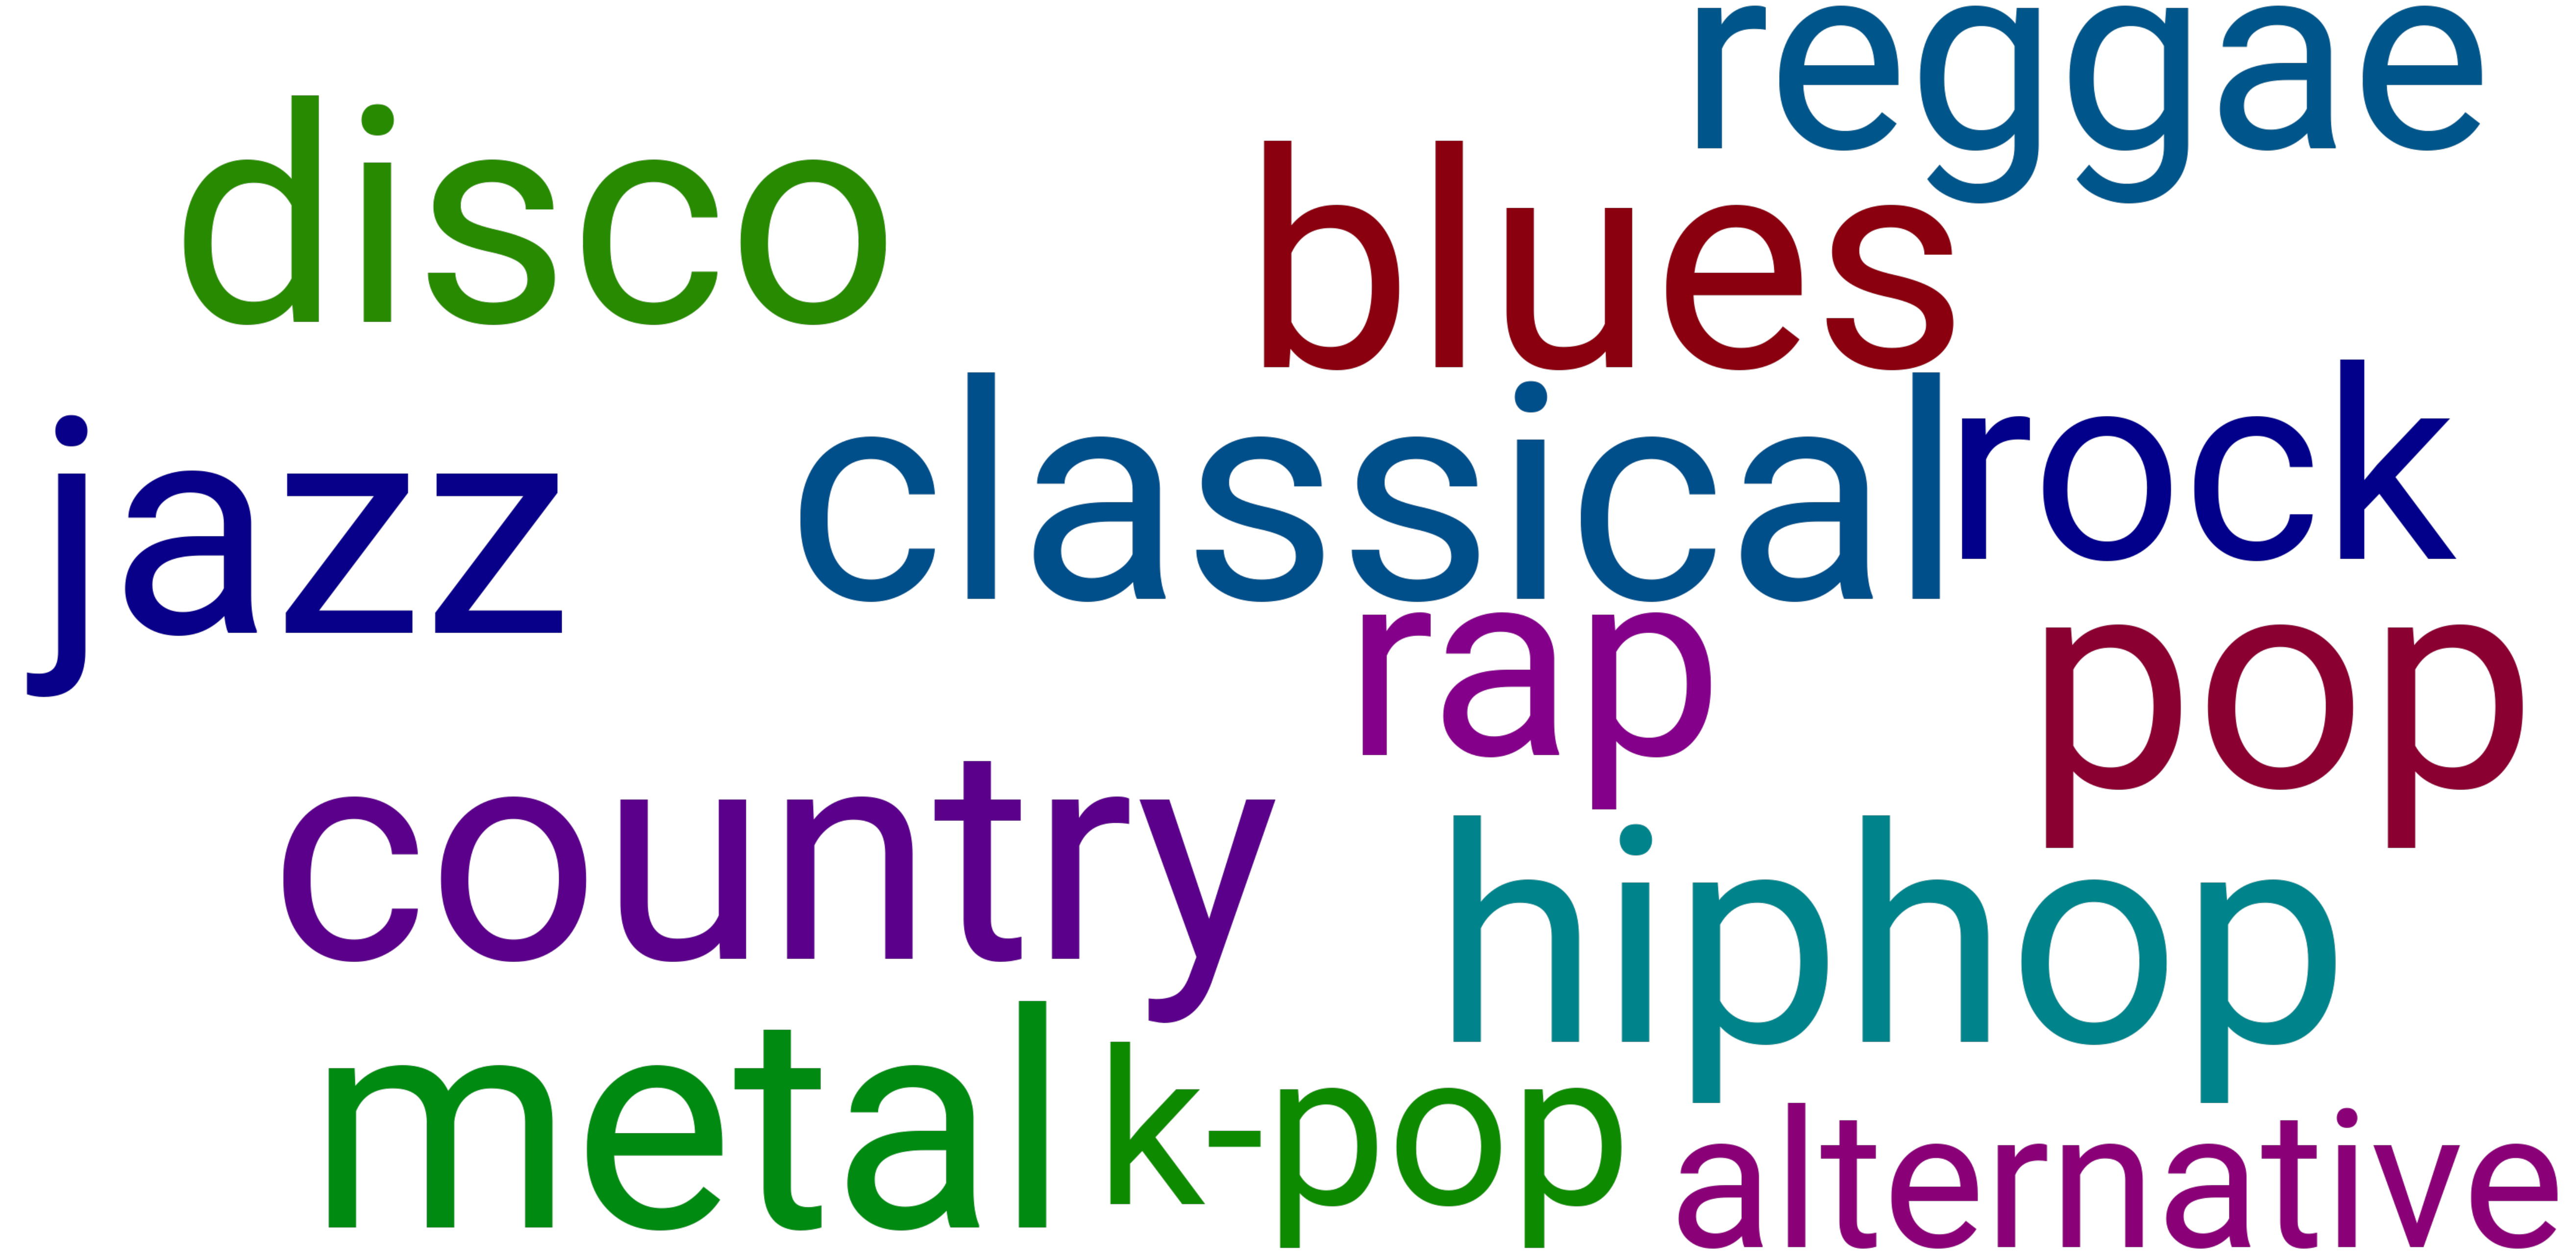

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import requests

# Function to generate random colors
def random_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, 27%)".format(random.randint(0, 360))

class CustomWordCloud(WordCloud):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _draw_word(self, **kwargs):
        # Override the orientation with a random choice
        kwargs['orientation'] = random.choice([None, 0, 1, 2, 3])
        return super()._draw_word(**kwargs)

# Input text
text = """
blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock
rap
k-pop
alternative
"""

# Path to the extracted Roboto-Regular.ttf file
font_path = "/content/drive/Shareddrives/Machine_Learning_Project_Drive/Roboto-Regular.ttf"

# Preprocess text to consider each line as a separate word
lines = text.split('\n')
frequencies = {line: 1 for line in lines}

# Create the word cloud
wordcloud = CustomWordCloud(width=3400, height=1650, prefer_horizontal=1, color_func=random_color,
                      background_color=None, mode='RGBA', font_path=font_path,
                      relative_scaling=0, max_font_size=400).generate_from_frequencies(frequencies)

# Plot the word cloud
plt.figure(figsize=(68, 33))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig('/content/drive/Shareddrives/Machine_Learning_Project_Drive/WordCloudGenres.png',  format='png', transparent=True)
plt.show()